In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
from pydataset import data

Boolean masking -  
We can use an array of boolean values to return a subset of our series.  
We only get back values where the boolean array is True.  
We can evaluate multiple statements at once.

In [3]:
my_series = pd.Series(range(1, 21, 1))

In [4]:
my_series[my_series > 10]

10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

In [5]:
my_series[my_series % 2 == 1]

0      1
2      3
4      5
6      7
8      9
10    11
12    13
14    15
16    17
18    19
dtype: int64

In [6]:
my_series[(my_series > 10) | (my_series % 2 == 1)]

0      1
2      3
4      5
6      7
8      9
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

The curriculum has a method for determining which values belong in the fourth quartile.  

We could also do it with [pd.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html#pandas.qcut).  

We will pass two arguments: the pandas series, and the number of bins we want (4 for quartiles).

In [7]:
pd.qcut(my_series, 4, labels=['q1', 'q2', 'q3', 'q4'])

0     q1
1     q1
2     q1
3     q1
4     q1
5     q2
6     q2
7     q2
8     q2
9     q2
10    q3
11    q3
12    q3
13    q3
14    q3
15    q4
16    q4
17    q4
18    q4
19    q4
dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

String vectorization.

We can perform string operations across all values in a series using the .str attribute.

In [8]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
mpg_t = mpg.trans

In [10]:
mpg_t.str.upper()

1        AUTO(L5)
2      MANUAL(M5)
3      MANUAL(M6)
4        AUTO(AV)
5        AUTO(L5)
          ...    
230      AUTO(S6)
231    MANUAL(M6)
232      AUTO(L5)
233    MANUAL(M5)
234      AUTO(S6)
Name: trans, Length: 234, dtype: object

In [11]:
mpg_t.str.replace('(', '_').str.replace(')', '_')

/var/folders/2c/brd9b1hs75g3ntjrdq28jc140000gp/T/ipykernel_38474/2966449829.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mpg_t.str.replace('(', '_').str.replace(')', '_')


1        auto_l5_
2      manual_m5_
3      manual_m6_
4        auto_av_
5        auto_l5_
          ...    
230      auto_s6_
231    manual_m6_
232      auto_l5_
233    manual_m5_
234      auto_s6_
Name: trans, Length: 234, dtype: object

In [12]:
mpg_t.head()

1      auto(l5)
2    manual(m5)
3    manual(m6)
4      auto(av)
5      auto(l5)
Name: trans, dtype: object

There are other methods available for use! Some common ones include..
- .any() and .all()
- .isin()
- .apply()

In [13]:
(mpg_t == 'auto(l5)').any()

True

In [14]:
(mpg_t == 'auto(l5)').all()

False

In [15]:
mpg_t.isin(['auto(l5)'])

1       True
2      False
3      False
4      False
5       True
       ...  
230    False
231    False
232     True
233    False
234    False
Name: trans, Length: 234, dtype: bool

In [16]:
my_series.head()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [17]:
def mathinator(n):
    
    return n * 2 + 4 / 3

In [18]:
my_series.apply(mathinator)

0      3.333333
1      5.333333
2      7.333333
3      9.333333
4     11.333333
5     13.333333
6     15.333333
7     17.333333
8     19.333333
9     21.333333
10    23.333333
11    25.333333
12    27.333333
13    29.333333
14    31.333333
15    33.333333
16    35.333333
17    37.333333
18    39.333333
19    41.333333
dtype: float64

We can bin values using pd.cut.

We can specify the number of bins to create, to make n bins of equal size.

We can also create the cutoffs for the bins ourselves.

In [19]:
pd.cut(my_series, [4, 9, 18])

0             NaN
1             NaN
2             NaN
3             NaN
4      (4.0, 9.0]
5      (4.0, 9.0]
6      (4.0, 9.0]
7      (4.0, 9.0]
8      (4.0, 9.0]
9     (9.0, 18.0]
10    (9.0, 18.0]
11    (9.0, 18.0]
12    (9.0, 18.0]
13    (9.0, 18.0]
14    (9.0, 18.0]
15    (9.0, 18.0]
16    (9.0, 18.0]
17    (9.0, 18.0]
18            NaN
19            NaN
dtype: category
Categories (2, interval[int64, right]): [(4, 9] < (9, 18]]

We can plot values from a series using the .plot() method.

We can further alter the plot by calling .plot.hist(), for example.

We can modify our plot by passing in arguments to the plotting method.

<AxesSubplot:>

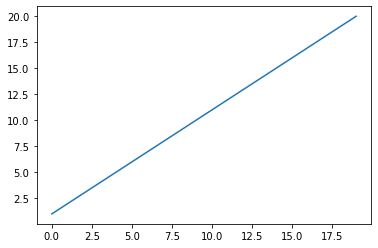

In [20]:
my_series.plot()

<AxesSubplot:title={'center':'title test'}>

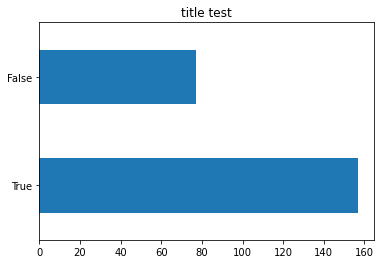

In [21]:
mpg_t.str.startswith('a').value_counts().plot.barh(title='title test')